In [66]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import heapq

import time
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/math2020vinunicompetition/sample/sample5.inp
/kaggle/input/math2020vinunicompetition/sample/sample0.out
/kaggle/input/math2020vinunicompetition/sample/sample1.out
/kaggle/input/math2020vinunicompetition/sample/sample0.inp
/kaggle/input/math2020vinunicompetition/sample/sample2.inp
/kaggle/input/math2020vinunicompetition/sample/sample1.inp
/kaggle/input/math2020vinunicompetition/sample/sample4.inp
/kaggle/input/math2020vinunicompetition/sample/sample3.inp


In [67]:
filenames

['sample5.inp',
 'sample0.out',
 'sample1.out',
 'sample0.inp',
 'sample2.inp',
 'sample1.inp',
 'sample4.inp',
 'sample3.inp']

In [68]:
inFile = '/kaggle/input/math2020vinunicompetition/sample/sample0.inp'
# ouFile = '/kaggle/input/math2020vinunicompetition/sample/sample1.out'
ouFile = '/kaggle/working/sample0.out'
# inFile = '/graph.inp'
# ouFile = '/graph.out'

In [69]:
def print_grid(grid):
    for row in grid:
        print(" ".join(map(str, row)))

In [70]:
f = open(inFile, 'r')
line = f.readline()
n, m, k = [int(x) for x in line.split()]
listBlocks = []
grid = [[0] * m for _ in range(n)]
for ii in range(k):
    line = f.readline()
    xx, yy = [int(x) for x in line.split()]
    grid[xx][yy] = 1

lline = f.readline()
print(lline)
sx, sy, ex, ey = [int(x) for x in lline.split()]
grid[sx][sy] = 2
grid[ex][ey] = 2
print_grid(grid)


5 0 4 6

0 0 0 0 1 0 0 0 1 0
1 0 1 0 1 0 0 0 0 0
0 0 1 0 0 0 0 0 0 1
1 0 0 1 0 0 0 0 0 1
0 0 0 0 1 0 2 0 1 0
2 1 0 0 0 1 0 0 1 0
0 1 1 0 0 1 1 1 0 1
1 0 1 1 0 1 0 0 0 0
0 0 0 0 0 0 0 1 0 1
0 0 0 0 0 0 0 1 0 1


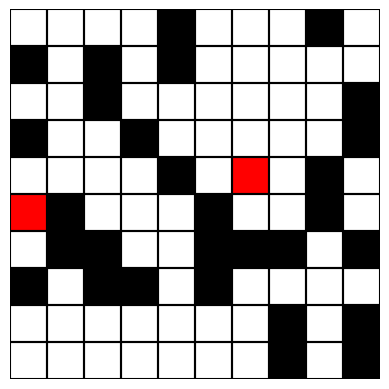

In [71]:

# Visualize the grid using matplotlib
colors = ['white', 'black', 'red']

# Create a figure and axis
fig, ax = plt.subplots()

# Plot the grid and add black lines
for i in range(len(grid)):
    for j in range(len(grid[0])):
        square_color = colors[grid[i][j]]
        ax.add_patch(plt.Rectangle((j, -i-1), 1, 1, fill=True, color=square_color))
        
        # Add black lines to separate squares
        ax.plot([j, j+1, j+1, j, j], [-i-1, -i-1, -i, -i, -i-1], color='black')

# Set aspect ratio and limits
ax.set_aspect('equal')
ax.set_xlim(0, len(grid[0]))
ax.set_ylim(-len(grid), 0)

# Hide the axes
ax.axis('off')

# Show the plot
plt.show()


Runtime: 0.0002689361572265625 seconds
16
5 0
4 0 
4 1 
3 1 
2 1 
1 1 
0 1 
0 2 
0 3 
1 3 
2 3 
2 4 
2 5 
2 6 
3 6 
4 6


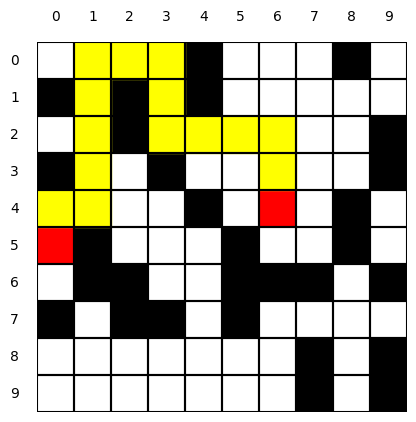

In [77]:


def heuristic(node, goal):
    return abs(node[0] - goal[0]) + abs(node[1] - goal[1])

def astar(grid, start, goal):
    rows, cols = len(grid), len(grid[0])
    directions = [(-1, 0), (0, -1), (1, 0), (0, 1)]  # Possible movement directions

    def is_valid(x, y):
        return 0 <= x < rows and 0 <= y < cols and grid[x][y] != 1  # Check if the position is within bounds and not blocked

    open_set = [(0, start)]  # Priority queue with initial node
    came_from = {}  # Dictionary to store parent nodes
    g_score = {start: 0}  # Cost from start to node

    while open_set:
        current_cost, current_node = heapq.heappop(open_set)

        if current_node == goal:
            path = []
            while current_node in came_from:
                path.insert(0, current_node)
                current_node = came_from[current_node]
            return path

        for dx, dy in directions:
            neighbor = (current_node[0] + dx, current_node[1] + dy)
            if is_valid(*neighbor):
                tentative_g_score = g_score[current_node] + 1  # Assuming each move has a cost of 1

                if neighbor not in g_score or tentative_g_score < g_score[neighbor]:
                    g_score[neighbor] = tentative_g_score
                    f_score = tentative_g_score + heuristic(neighbor, goal)
                    heapq.heappush(open_set, (f_score, neighbor))
                    came_from[neighbor] = current_node

    return None  # No path found

# Find the shortest path
start = (sx, sy)
goal = (ex, ey)

# Calculate run time
start_time = time.time()
path = astar(grid, start, goal)
end_time = time.time()
runtime = end_time - start_time
print(f"Runtime: {runtime} seconds")

 
if path and goal in path:
    path.remove(goal)

# print shortest path
if path:
    print(len(path)+2)
    print(str(start[0]) + ' ' + str(start[1]))
    for node in path:
        for i in range(len(node)):
            print(node[i],end=' ')
        print()
    print(str(goal[0]) + ' ' + str(goal[1]))
else:
    print("No path found.")

with open('sample0.out', 'w') as file:
    if path:
        file.write(str(len(path) + 2) + '\n')
        file.write(str(start[0])+' ')
        file.write(str(start[1]) + '\n')
        for node in path:
            for i in range(len(node)):
                file.write(str(node[i]) + ' ')
            file.write('\n')
        file.write(str(goal[0]) + ' ')
        file.write(str(goal[1])+'\n')
    else:
        file.write("No path found.\n")
    
# Visualize the grid using matplotlib
colors = ['white', 'black', 'red', 'yellow']  # Adding yellow for the path

# Create a figure and axis
fig, ax = plt.subplots()

# Plot the grid and add black lines
for i in range(len(grid)):
    for j in range(len(grid[0])):
        square_color = colors[grid[i][j]]
        ax.add_patch(plt.Rectangle((j, -i-1), 1, 1, fill=True, color=square_color))

        # Add black lines to separate squares
        ax.plot([j, j+1, j+1, j, j], [-i-1, -i-1, -i, -i, -i-1], color='black')

# Highlight the path in yellow
if path:
    for node in path:
        i, j = node
        ax.add_patch(plt.Rectangle((j, -i-1), 1, 1, fill=True, color='yellow'))

# Set aspect ratio and limits
ax.set_aspect('equal')
ax.set_xlim(0, len(grid[0]))
ax.set_ylim(-len(grid), 0)

# Add row and column indices to the side
# for i in range(len(grid)):
#     ax.text(-0.5, -i - 0.5, str(len(grid) - 1 - i), ha='right', va='center')
#     ax.text(i + 0.5, 0.5, str(i), ha='center', va='bottom')

for i in range(len(grid)):
    ax.text(-0.5, -i - 0.5, str(i), ha='right', va='center')
    ax.text(i + 0.5, 0.5, str(i), ha='center', va='bottom')
    
# Hide the axes
ax.axis('off')

# Show the plot
plt.show()
